In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
xy = np.loadtxt('C:/Users/user/Desktop/ESC_20_2/ESC-20SUMMER/PyTorch/data-04-zoo.csv', delimiter=',', dtype=np.float32)

In [4]:
col = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type']
df = pd.DataFrame(xy, columns=col)
df.tail()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,5.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
100,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0


In [5]:
x_data = df.iloc[:, 0:-1]
y_data = df.iloc[: ,-1]

In [6]:
x_data.shape

(101, 16)

In [7]:
pd.Series(y_data).value_counts() # 7개 갖고 있음

0.0    41
1.0    20
3.0    13
6.0    10
5.0     8
2.0     5
4.0     4
Name: type, dtype: int64

In [8]:
# label encoder
# 값들이 수치형이 아니라 categorical 일때에 one hot encode 를 위해 수치형으로 변환해야함
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # 객체선언
encoder.fit(y_data)           # fit method
y = encoder.transform(y_data) # transform method
y_data                        # 수치형으로 변환 완료

0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
96     0.0
97     5.0
98     0.0
99     6.0
100    1.0
Name: type, Length: 101, dtype: float32

In [9]:
# One - hot encoding
from keras.utils import np_utils
y_data = np_utils.to_categorical(y_data)
y_data

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [10]:
# 데이터 셋을 train과 test로 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [11]:
# 모델 구성
model = keras.models.Sequential()
model.add(keras.layers.Dense(10,input_dim = 16, activation = 'relu'))
model.add(keras.layers.Dense(7, activation = 'softmax'))

In [12]:
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [13]:
fit = model.fit(x_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

In [14]:
hist = pd.DataFrame(fit.history)
hist

,loss,accuracy
0,2.313184,0.173333
1,2.219230,0.200000
2,2.142665,0.200000
3,2.070187,0.200000
4,2.002993,0.200000
...,...,...
95,0.355929,0.920000
96,0.351016,0.920000
97,0.346408,0.920000
98,0.342552,0.920000


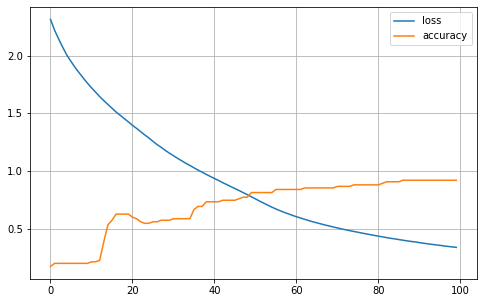

In [15]:
hist.plot(figsize=(8, 5))
plt.grid(True)

In [16]:
# 모델 평가하기
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.8462


[0.5241203904151917, 0.8461538553237915]

In [22]:
df = pd.read_csv('C:/Users/user/Desktop/ESC_20_2/ESC-20SUMMER/Keras_Study/file/glass.csv')

In [25]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [26]:
x_data = df.iloc[:,0:-1]
x_data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0


In [46]:
y_data = df.iloc[:,-1]
y_data.tail()

209    7
210    7
211    7
212    7
213    7
Name: Type, dtype: int64

In [47]:
pd.Series(y_data).value_counts()  # 7개 갖고 있음

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [48]:
print(x_data.shape)
print(y_data.shape)

(214, 9)
(214,)


In [49]:
encoder = LabelEncoder() # 객체선언
encoder.fit(y_data)           # fit method
y = encoder.transform(y_data) # transform method
y_data = y_data-1             # 1부터 7이라서 0부터 6으로 바꿈

In [51]:
y_data = np_utils.to_categorical(y_data)
y_data.shape

(214, 7)

In [52]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [54]:
# 모델 구성
model = keras.models.Sequential()
model.add(keras.layers.Dense(10,input_dim = 9, activation = 'relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(7, activation = 'softmax'))

In [55]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [56]:
fit = model.fit(x_train, y_train, batch_size = 20, epochs = 100, verbose=0)

In [57]:
hist = pd.DataFrame(fit.history)
hist

,loss,accuracy
0,13.331778,0.03125
1,11.619827,0.03125
2,10.033615,0.03125
3,8.425088,0.03125
4,7.001947,0.03750
...,...,...
95,1.336416,0.48750
96,1.334367,0.50625
97,1.336207,0.50625
98,1.332045,0.56875


In [78]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(20, input_dim = 9, activation = 'relu'))
model2.add(keras.layers.Dense(20, activation='relu'))
model2.add(keras.layers.Dense(7, activation = 'softmax'))

In [79]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [80]:
fit2 = model2.fit(x_train, y_train, batch_size=20, epochs=1000, verbose=0)

In [81]:
hist2 = pd.DataFrame(fit2.history)
hist2

,loss,accuracy
0,13.448225,0.26875
1,10.550129,0.33125
2,8.053691,0.41250
3,6.061837,0.36875
4,4.615154,0.35000
...,...,...
995,0.597284,0.77500
996,0.600120,0.77500
997,0.611796,0.73750
998,0.589757,0.77500


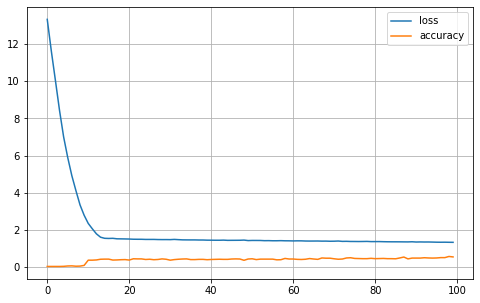

In [82]:
hist.plot(figsize=(8, 5))
plt.grid(True)

In [83]:
# 모델 평가하기
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 993us/step - loss: 1.3280 - accuracy: 0.5000


[1.3279643058776855, 0.5]